# Validation Reduced-Order SG VBR models & controllers with SMIB System

## Import dpsimpy

In [1]:
import sys
sys.path.insert(0,'/home/mmo-cya/dpsim/build')
import dpsimpy

## Load PSAT Results

In [2]:
from villas.dataprocessing.readtools import *
from villas.dataprocessing.timeseries import *
import os
import urllib.request

if not os.path.exists('reference-results'):
    os.mkdir('reference-results')

url = 'https://raw.githubusercontent.com/dpsim-simulator/reference-results/master/PSAT/SMIB-Fault/PSAT_3OrderSyGen_SMIB_Fault_100mS_TS_1mS.out.txt'
local_file_3Order = 'reference-results/PSAT_3OrderSyGen_SMIB_Fault_100mS_TS_1mS.out'
urllib.request.urlretrieve(url, local_file_3Order) 
ts_psat_3Order = read_timeseries_dpsim(local_file_3Order)

url = 'https://raw.githubusercontent.com/dpsim-simulator/reference-results/master/PSAT/SMIB-Fault/PSAT_4OrderSyGen_SMIB_Fault_100mS_TS_1mS.out.txt'
local_file_4Order = 'reference-results/PSAT_4OrderSyGen_SMIB_Fault_100mS_TS_1mS.out'
urllib.request.urlretrieve(url, local_file_4Order)
ts_psat_4Order = read_timeseries_dpsim(local_file_4Order)

url = 'https://raw.githubusercontent.com/dpsim-simulator/reference-results/master/PSAT/SMIB-Fault/PSAT_5bOrderSyGen_SMIB_Fault_100mS_TS_1mS.out.txt'
local_file_5bOrder = 'reference-results/PSAT_5bOrderSyGen_SMIB_Fault_100mS_TS_1mS.out'
urllib.request.urlretrieve(url, local_file_5bOrder)
ts_psat_5bOrder = read_timeseries_dpsim(local_file_5bOrder)

url = 'https://raw.githubusercontent.com/dpsim-simulator/reference-results/master/PSAT/SMIB-Fault/PSAT_6OrderSyGen_SMIB_Fault_100mS_TS_1mS.out.txt'
local_file_6Order = 'reference-results/PSAT_6OrderSyGen_SMIB_Fault_100mS_TS_1mS.out'
urllib.request.urlretrieve(url, local_file_6Order)
ts_psat_6Order = read_timeseries_dpsim(local_file_6Order)

column number: 11
results length: 20003
real column names: ['delta', 'omega', 'eq_t', 'theta_bus1', 'theta_bus3', 'V_Bus1', 'V_Bus3', 'vf', 'pm', 'p', 'q']
complex column names: []
column number: 12
results length: 20003
real column names: ['delta', 'omega', 'eq_t', 'ed_t', 'theta_bus1', 'theta_bus3', 'V_Bus1', 'V_Bus3', 'vf', 'pm', 'p', 'q']
complex column names: []
column number: 13
results length: 20003
real column names: ['delta', 'omega', 'eq_t', 'eq_s', 'ed_s', 'theta_bus1', 'theta_bus3', 'V_Bus1', 'V_Bus3', 'vf', 'pm', 'p', 'q']
complex column names: []
column number: 14
results length: 20003
real column names: ['delta', 'omega', 'eq_t', 'ed_t', 'eq_s', 'ed_s', 'theta_bus1', 'theta_bus3', 'V_Bus1', 'V_Bus3', 'vf', 'pm', 'p', 'q']
complex column names: []


## Calculate $V_d$, $V_q$, $I_d$ and $I_q$ in PSAT

### 3th Order Model

In [3]:
#calculate vd and vq
angle = ts_psat_3Order['delta'].values - ts_psat_3Order['theta_bus1'].values
V_bus1 = ts_psat_3Order['V_Bus1'].values
vd = V_bus1 * np.sin(angle)
ts_psat_3Order['vd'] = TimeSeries('vd', ts_psat_3Order['V_Bus1'].time, vd)
vq = V_bus1 * np.cos(angle)
ts_psat_3Order['vq'] = TimeSeries('vq', ts_psat_3Order['V_Bus1'].time, vq)

#calculate id and iq in PSAT
Xd_t = 0.299900
Xq = 1.7600
i_d = (ts_psat_3Order['eq_t'].values - ts_psat_3Order['vq'].values) / Xd_t
ts_psat_3Order['id'] = TimeSeries('id', ts_psat_3Order['eq_t'].time, i_d)
i_q = ts_psat_3Order['vd'].values / Xq
ts_psat_3Order['iq'] = TimeSeries('iq', ts_psat_3Order['vd'].time, i_q)

### 4th Order Model

In [4]:
#calculate vd and vq
angle = ts_psat_4Order['delta'].values - ts_psat_4Order['theta_bus1'].values
V_bus1 = ts_psat_4Order['V_Bus1'].values
vd = V_bus1 * np.sin(angle)
ts_psat_4Order['vd'] = TimeSeries('vd', ts_psat_4Order['V_Bus1'].time, vd)
vq = V_bus1 * np.cos(angle)
ts_psat_4Order['vq'] = TimeSeries('vq', ts_psat_4Order['V_Bus1'].time, vq)
    
#calculate id and iq in PSAT
Xd = 0.299900
Xq = 0.650000
i_d = (ts_psat_4Order['eq_t'].values - ts_psat_4Order['vq'].values) / Xd
ts_psat_4Order['id'] = TimeSeries('id', ts_psat_4Order['eq_t'].time, i_d)
i_q = -(ts_psat_4Order['ed_t'].values - ts_psat_4Order['vd'].values) / Xq
ts_psat_4Order['iq'] = TimeSeries('iq', ts_psat_4Order['ed_t'].time, i_q)

### 5th Order type 2 Model

In [5]:
#calculate vd and vq
angle = ts_psat_5bOrder['delta'].values - ts_psat_5bOrder['theta_bus1'].values
V_bus1 = ts_psat_5bOrder['V_Bus1'].values
vd = V_bus1 * np.sin(angle)
ts_psat_5bOrder['vd'] = TimeSeries('vd', ts_psat_5bOrder['V_Bus1'].time, vd)
vq = V_bus1 * np.cos(angle)
ts_psat_5bOrder['vq'] = TimeSeries('vq', ts_psat_5bOrder['V_Bus1'].time, vq)
    
#calculate id and iq in PSAT
Xd_s = 0.2299
Xq_s = 0.2500
i_d = (ts_psat_5bOrder['eq_s'].values - ts_psat_5bOrder['vq'].values) / Xd_s
ts_psat_5bOrder['id'] = TimeSeries('id', ts_psat_5bOrder['eq_t'].time, i_d)
i_q = -(ts_psat_5bOrder['ed_s'].values - ts_psat_5bOrder['vd'].values) / Xq_s
ts_psat_5bOrder['iq'] = TimeSeries('iq', ts_psat_5bOrder['ed_s'].time, i_q)

### 6th Order Model (Marconato's model)

In [6]:
#calculate vd and vq
angle = ts_psat_6Order['delta'].values - ts_psat_6Order['theta_bus1'].values
V_bus1 = ts_psat_6Order['V_Bus1'].values
vd = V_bus1 * np.sin(angle)
ts_psat_6Order['vd'] = TimeSeries('vd', ts_psat_6Order['V_Bus1'].time, vd)
vq = V_bus1 * np.cos(angle)
ts_psat_6Order['vq'] = TimeSeries('vq', ts_psat_6Order['V_Bus1'].time, vq)

#calculate id and iq in PSAT\n",
Xd_s = 0.2299
Xq_s = 0.2500
i_d = (ts_psat_6Order['eq_s'].values - ts_psat_6Order['vq'].values) / Xd_s
ts_psat_6Order['id'] = TimeSeries('id', ts_psat_6Order['eq_s'].time, i_d)
i_q = -(ts_psat_6Order['ed_s'].values - ts_psat_6Order['vd'].values) / Xq_s
ts_psat_6Order['iq'] = TimeSeries('iq', ts_psat_6Order['ed_s'].time, i_q)

## Define nominal values

In [7]:
# nominal values (per unit)
nominal_values = {}
nominal_values['Te'] = 0.540541
nominal_values['Edq0_0'] = 0.403062     #4th order model
nominal_values['Edq0_1'] = 0.944802     #3th and 4th order model
nominal_values['Edq0_t_0'] = 0.392200   #5th and 6th order model
nominal_values['Edq0_t_1'] = 0.946405   #5th and 6th order model
nominal_values['Edq0_s_0'] = 0.548309   #5th and 6th order model
nominal_values['Edq0_s_1'] = 0.918731   #5th and 6th order model
nominal_values['Vdq0_0'] = 0.639089
nominal_values['Vdq0_1'] = 0.833106
nominal_values['Idq0_0'] = 0.372443
nominal_values['Idq0_1'] = 0.363119
nominal_values['delta'] = 0.909230
nominal_values['w_r'] = 1.0

nominal_grid_voltage = 24e3

#
titles = {}
titles['Te'] = 'Electrical Torque'
titles['Edq0_0'] = 'd-component of the voltage behind the transient reactance'
titles['Edq0_1'] = 'q-component of the voltage behind the transient reactance'
titles['Edq0_t_0'] = 'd-component of the voltage behind the transient reactance'
titles['Edq0_t_1'] = 'd-component of the voltage behind the transient reactance'
titles['Edq0_s_0'] = 'd-component of the voltage behind the sub-transient reactance'
titles['Edq0_s_1'] = 'd-component of the voltage behind the sub-transient reactance'
titles['Vdq0_0'] = 'd-component of the terminal voltage'
titles['Vdq0_1'] = 'q-component of the terminal voltage'
titles['Idq0_0'] = 'd-component of the terminal current'
titles['Idq0_1'] = 'q-component of the terminal current'
titles['delta'] = 'Delta'
titles['w_r'] = 'Mechanical Omega'

#
ylabels = {}
ylabels['Te'] = 'Torque (p.u.)'
ylabels['Edq0_0'] = 'Ed_t (p.u.)'
ylabels['Edq0_1'] = 'Eq_t (p.u.)'
ylabels['Edq0_t_0'] = 'Ed_t (p.u.)'
ylabels['Edq0_t_1'] = 'Eq_t (p.u.)'
ylabels['Edq0_s_0'] = 'Ed_s (p.u.)'
ylabels['Edq0_s_1'] = 'Eq_s (p.u.)'
ylabels['Vdq0_0'] = 'Vd (p.u.)'
ylabels['Vdq0_1'] = 'Vq (p.u.)'
ylabels['Idq0_0'] = 'Id (p.u.)'
ylabels['Idq0_1'] = 'Iq (p.u.)'
ylabels['delta'] = 'Delta (rad)'
ylabels['w_r'] = 'w_r (p.u.)'

## Declare plot function

In [8]:
import matplotlib.pyplot as plt

timestep_common = 10e-6
t_begin = 0
t_end = 10
begin_idx = int(t_begin/timestep_common)
end_idx= int(t_end/timestep_common)
time = np.linspace(t_begin, t_end, num=end_idx-begin_idx)

#plot parameters
width = 12
height = 4

def plot_variable(title, varname_dpsim, varname_psat, ts_dpsim, ts_psat, nominal_values, ylabels):
    fig1 = plt.figure(figsize=(width, height))
    dpsim_values = ts_dpsim[varname_dpsim].interpolate(timestep_common).values[begin_idx:end_idx]
    psat_values = ts_psat[varname_psat].interpolate(timestep_common).values[begin_idx:end_idx]
    plt.plot(time, dpsim_values, label='DPSim')
    #plt.plot(time, psat_values, '--', label='PSAT')
    plt.legend(loc='lower right')
    plt.xlabel('time (s)')
    plt.ylabel(ylabels[varname_dpsim])
    plt.grid()
    plt.xlim([t_begin, t_end])
    plt.show
        
    #calculate RMSE
    nom_value = nominal_values[varname_dpsim]
    rmse = np.sqrt(((dpsim_values - psat_values) ** 2).mean())
    print('RMSE {:s}  = {:.6f} (pu), which is {:.3f}% of the nominal value = {:.3f} (pu) '.format(varname_dpsim, rmse, rmse/nom_value*100, nom_value))
        
    return 0

def plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim, ts_psat, nominal_voltage, ylabels):
    
    #convert dpsim voltage to magnitude value and per-unit for comparison with psat
    dpsim_values_abs_pu = ts_dpsim[varname_dpsim].interpolate(timestep_common).abs().values[begin_idx:end_idx]/nominal_voltage
    psat_values = ts_psat[varname_psat].interpolate(timestep_common).values[begin_idx:end_idx]
    
    fig1 = plt.figure(figsize=(width, height))
    plt.plot(time, dpsim_values_abs_pu, label='DPSim')
    #plt.plot(time, psat_values, '--', label='PSAT')
    plt.legend(loc='lower right')
    plt.xlabel('time (s)')
    plt.show
      
     #calculate RMSE
    rmse = np.sqrt(((dpsim_values_abs_pu - psat_values) ** 2).mean())
    print('RMSE {:s}  = {:.6f} (pu), which is {:.3f}% of the nominal value = {:.3f} (pu) '.format(varname_dpsim, rmse, rmse/1.0*100, 1.0))
        
    return 0


def plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim, ts_psat, nominal_voltage, ylabels):
    #limit rmse to post-fault evaluation
    t_post_begin=1.1
    t_post_end=t_end
    begin_post_idx = int(t_post_begin/timestep_common)
    end_post_idx= int(t_post_end/timestep_common)
    time_post = np.linspace(begin_post_idx, end_post_idx, num=end_post_idx-begin_post_idx)
    
    dpsim_values = ts_dpsim[varname_dpsim].interpolate(timestep_common).phase().values[begin_idx:end_idx]
    dpsim_values_post = dpsim_values[begin_post_idx:end_post_idx]
    psat_values = ts_psat[varname_psat].interpolate(timestep_common).values[begin_idx:end_idx]/np.pi*180
    psat_values_post = psat_values[begin_post_idx:end_post_idx]
    
    fig2 = plt.figure(figsize=(width, height))
    plt.plot(time, dpsim_values, label='DPSim')
    #plt.plot(time, psat_values, '--', label='PSAT')
    plt.legend(loc='lower right')
    plt.xlabel('time (s)')
    plt.show
    
     #calculate RMSE
    rmse = np.sqrt(((dpsim_values_post - psat_values_post) ** 2).mean())
    print('RMSE Post-Fault {:s}  = {:.6f} (deg)'.format(varname_dpsim, rmse))
        
    return 0

## Parametrization

In [9]:
from math import sqrt, pi

### Power System
nominal_voltage_hv = 230e3
nominal_voltage_mv = 24e3
ratio = nominal_voltage_hv/nominal_voltage_mv
frequency = 60
omega = 2 * pi * frequency

### Generator
nom_power = 555e6
set_point_active_power = 300e6
set_point_voltage = 1.05*nominal_voltage_mv
H = 3.7
Td0_t = 8.0669
Td0_s = 0.0300
Td_t = 1.3368
Td_s = 0.0230
Ld_t = 0.2999
Ld_s = 0.2299
Tq0_t = 0.9991
Tq0_s = 0.0700
Lq_t = 0.6500
Lq_s = 0.2500
Ld = 1.8099
Lq = 1.7600
L0 = 0.15
Taa = 0

### Trafo
transformer_resistance = 0
transformer_reactance = 10.8108

### Excitation system
Ka = 46
Ta = 0.06
Ke = -0.0435
Te = 0.46
Kf = 0.1
Tf = 1
Tr = 0.02

### Turbine Goverour
OmegaRef = 1.0
R = 0.02
Tmax = 1.2
Tmin = 0.3
Ts = 0.1
Tc = 0.45
T3 = 0.0
T4 = 12.0
T5 = 50.0
        
### PiLine parameters calculated from CIGRE Benchmark system
line_length = 100
line_resistance = 1.27e-4 * 529 * line_length
line_inductance = 9.05e-4 * 529 / omega * line_length
line_capacitance = (1.81e-3 / 529) / omega * line_length
line_conductance = 0

### Switch
switch_closed = 0.001
switch_open = 1e6

## Run powerflow for Initialization

In [10]:
sim_name_pf = "SP_ReducedOrderSG_SMIB_" + "PF_"
dpsimpy.Logger.set_log_dir("logs/" + sim_name_pf)

### Nodes
gnd_pf = dpsimpy.sp.SimNode.gnd
n1_pf  = dpsimpy.sp.SimNode('n1_pf', dpsimpy.PhaseType.Single)
n2_pf  = dpsimpy.sp.SimNode('n2_pf', dpsimpy.PhaseType.Single)
n3_pf  = dpsimpy.sp.SimNode('n3_pf', dpsimpy.PhaseType.Single)

### Components

# synchron generator
gen_pf = dpsimpy.sp.ph1.SynchronGenerator('gen_pf', dpsimpy.LogLevel.debug)
gen_pf.set_parameters(rated_apparent_power=nom_power, rated_voltage=nominal_voltage_mv, 
                      set_point_active_power=set_point_active_power, set_point_voltage=set_point_voltage, 
                      powerflow_bus_type=dpsimpy.PowerflowBusType.PV)
gen_pf.set_base_voltage(nominal_voltage_mv)
gen_pf.modify_power_flow_bus_type(dpsimpy.PowerflowBusType.PV)

# Transformer
trafo_pf = dpsimpy.sp.ph1.Transformer("trafo", dpsimpy.LogLevel.debug)
trafo_pf.set_parameters(nominal_voltage_hv, nominal_voltage_mv, ratio, 0, transformer_resistance, transformer_reactance/omega)
trafo_pf.set_base_voltage(nominal_voltage_hv)
 
# Grid bus as Slack
extnet_pf = dpsimpy.sp.ph1.NetworkInjection("Slack", dpsimpy.LogLevel.debug)
extnet_pf.set_parameters(nominal_voltage_hv)
extnet_pf.set_base_voltage(nominal_voltage_hv)
extnet_pf.modify_power_flow_bus_type(dpsimpy.PowerflowBusType.VD)

# PiLine
pi_line_pf = dpsimpy.sp.ph1.PiLine('Pi_Line_pf', dpsimpy.LogLevel.debug)
pi_line_pf.set_parameters(R=line_resistance, L=line_inductance, C=line_capacitance, G=line_conductance)
pi_line_pf.set_base_voltage(nominal_voltage_hv)

### Connections
gen_pf.connect([n1_pf])
trafo_pf.connect([n2_pf, n1_pf])
pi_line_pf.connect([n2_pf, n3_pf])
extnet_pf.connect([n3_pf])

### Define system topology
system_pf = dpsimpy.SystemTopology(frequency, [n1_pf, n2_pf, n3_pf], [gen_pf, trafo_pf, pi_line_pf, extnet_pf])

# Logging
logger_pf = dpsimpy.Logger(sim_name_pf)
logger_pf.log_attribute('n1.v', 'v', n1_pf)
logger_pf.log_attribute('n2.v', 'v', n2_pf)
logger_pf.log_attribute('n3.v', 'v', n3_pf)
logger_pf.log_attribute('p_inj', 'p_inj', extnet_pf)
logger_pf.log_attribute('q_inj', 'q_inj', extnet_pf)

sim_pf = dpsimpy.Simulation(sim_name_pf, dpsimpy.LogLevel.debug)
sim_pf.set_system(system_pf)
sim_pf.set_domain(dpsimpy.Domain.SP)
sim_pf.set_solver(dpsimpy.Solver.NRP)
sim_pf.set_solver_component_behaviour(dpsimpy.SolverBehaviour.Initialization)
sim_pf.set_time_step(0.1)
sim_pf.set_final_time(0.5)
sim_pf.add_logger(logger_pf)
sim_pf.run()

[15:02:51.592825 Pi_Line_pf warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:02:51.594215 SP_ReducedOrderSG_SMIB_PF_ info] Initialize simulation: SP_ReducedOrderSG_SMIB_PF_
[15:02:51.596314 SP_ReducedOrderSG_SMIB_PF_ info] Scheduling tasks.
[15:02:51.596546 SP_ReducedOrderSG_SMIB_PF_ info] Scheduling done.
[15:02:51.596549 SP_ReducedOrderSG_SMIB_PF_ info] Opening interfaces.
[15:02:51.596551 SP_ReducedOrderSG_SMIB_PF_ info] Start synchronization with remotes on interfaces
[15:02:51.596552 SP_ReducedOrderSG_SMIB_PF_ info] Synchronized simulation start with remotes
[15:02:51.596555 SP_ReducedOrderSG_SMIB_PF_ info] Start simulation: SP_ReducedOrderSG_SMIB_PF_
[15:02:51.596570 SP_ReducedOrderSG_SMIB_PF_ info] Time step: 1.000000e-01
[15:02:51.596573 SP_ReducedOrderSG_SMIB_PF_ info] Final time: 5.000000e-01
[15:02:51.600186 SP_ReducedOrderSG_SMIB_PF_ info] Simulation calculation time: 0.003609
[15:02:51.600237 SP_ReducedOrderSG_SMIB_PF_ info] Simulation finished

### Convert DPsim to CIMpy 

In [12]:
from cimpy import DPsimToCIMpy


network_pf =  DPsimToCIMpy.DPsimToCIMpy(system_pf, sim_pf)
network_pf



{'meta_info': {'namespaces': {'rdf': 'http://www.w3.org/1999/02/22-rdf-syntax-ns#',
   'cim': 'http://iec.ch/TC57/2013/CIM-schema-cim16#',
   'md': 'http://iec.ch/TC57/61970-552/ModelDescription/1#',
   'entsoe': 'http://entsoe.eu/CIM/SchemaExtension/3/1#'},
  'urls': {},
  'author': 'DPsim'},
 'topology': {'n1_pf': <cimpy.cgmes_v2_4_15.TopologicalNode.TopologicalNode at 0x7ff4ff1a39d0>,
  'n1_pf-sv': <cimpy.cgmes_v2_4_15.SvVoltage.SvVoltage at 0x7ff4ff1a3280>,
  'n2_pf': <cimpy.cgmes_v2_4_15.TopologicalNode.TopologicalNode at 0x7ff4ff1a3850>,
  'n2_pf-sv': <cimpy.cgmes_v2_4_15.SvVoltage.SvVoltage at 0x7ff4ff1a3a90>,
  'n3_pf': <cimpy.cgmes_v2_4_15.TopologicalNode.TopologicalNode at 0x7ff4ff1a37f0>,
  'n3_pf-sv': <cimpy.cgmes_v2_4_15.SvVoltage.SvVoltage at 0x7ff4ff1a3d00>,
  'Terminal_gen_pf': <cimpy.cgmes_v2_4_15.Terminal.Terminal at 0x7ff4fc305ac0>,
  'RegulatingControlgen_pf': <cimpy.cgmes_v2_4_15.RegulatingControl.RegulatingControl at 0x7ff4fc305d90>,
  'GeneratingUnit_gen_pf': <ci

In [13]:
os.getcwd()

'/home/mmo-cya/dpsim/examples/Notebooks/Circuits'

### Convert back from CIMpy to DPsim

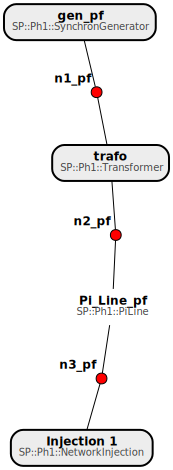

In [14]:
from cimpy import CIMpyToDPsim
from cimpy.CIMpyToDPsim import Domain


system_pf_reconverted, K = CIMpyToDPsim.CIMpyToDPsim(network_pf, Domain.PF)
system_pf_reconverted



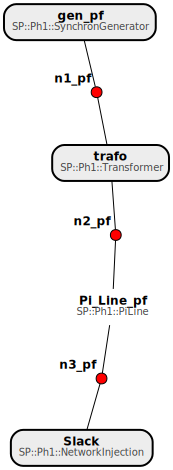

In [48]:
system_pf

## Declare DPSim Topology for SP simulations

In [15]:
def sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, gen_model, final_time=20, time_step=0.001):
    
    # ## Extract relevant powerflow results
    init_electrical_power = gen_pf.get_apparent_power()
    init_mechanical_power = gen_pf.get_apparent_power().real

    ### DPsim SP simulation
    name = "SP_ReducedOrderSG_SMIB_" + gen_model
    dpsimpy.Logger.set_log_dir("logs/" + name)

    ### Nodes
    gnd = dpsimpy.sp.SimNode.gnd
    n1 = dpsimpy.sp.SimNode('n1', dpsimpy.PhaseType.Single) 
    n1.set_initial_voltage(sim_pf.get_idobj_attr(n1_pf.name(), 'v').get()[0])

    n2 = dpsimpy.sp.SimNode('n2', dpsimpy.PhaseType.Single)
    n2.set_initial_voltage(sim_pf.get_idobj_attr(n2_pf.name(), 'v').get()[0])
    
    n3 = dpsimpy.sp.SimNode('n3', dpsimpy.PhaseType.Single)
    n3.set_initial_voltage(sim_pf.get_idobj_attr(n3_pf.name(), 'v').get()[0])


    ### Components

    # synchron generator
    gen = None
    if (gen_model=="3Order"):
        gen = dpsimpy.sp.ph1.SynchronGenerator3OrderVBR('gen', dpsimpy.LogLevel.debug)
        gen.set_operational_parameters_per_unit(nom_power=nom_power, nom_voltage=nominal_voltage_mv, nom_frequency=frequency, 
                                                H=H, Ld=Ld, Lq=Lq, L0=L0, Ld_t=Ld_t, Td0_t=Td0_t)
    elif (gen_model=="4Order"):
        gen = dpsimpy.sp.ph1.SynchronGenerator4OrderVBR('gen', dpsimpy.LogLevel.debug)
        gen.set_operational_parameters_per_unit(nom_power=nom_power, nom_voltage=nominal_voltage_mv, nom_frequency=frequency, 
                                                H=H, Ld=Ld, Lq=Lq, L0=L0, Ld_t=Ld_t, Lq_t=Lq_t, Td0_t=Td0_t, Tq0_t=Tq0_t)
    elif (gen_model=="5Order"):
        gen = dpsimpy.sp.ph1.SynchronGenerator5OrderVBR('gen', dpsimpy.LogLevel.debug)
        gen.set_operational_parameters_per_unit(nom_power=nom_power, nom_voltage=nominal_voltage_mv, nom_frequency=frequency, 
                                                H=H, Ld=Ld, Lq=Lq, L0=L0, Ld_t=Ld_t, Lq_t=Lq_t, Td0_t=Td0_t, Tq0_t=Tq0_t,
                                                Ld_s=Ld_s, Lq_s=Lq_s, Td0_s=Td0_s, Tq0_s=Tq0_s, Taa=Taa)
    elif (gen_model=="6aOrder"):
        gen = dpsimpy.sp.ph1.SynchronGenerator6aOrderVBR('gen', dpsimpy.LogLevel.debug)
        gen.set_operational_parameters_per_unit(nom_power=nom_power, nom_voltage=nominal_voltage_mv, nom_frequency=frequency, 
                                                H=H, Ld=Ld, Lq=Lq, L0=L0, Ld_t=Ld_t, Lq_t=Lq_t, Td0_t=Td0_t, Tq0_t=Tq0_t,
                                                Ld_s=Ld_s, Lq_s=Lq_s, Td0_s=Td0_s, Tq0_s=Tq0_s, Taa=Taa)	
    elif (gen_model=="6bOrder"):
        gen = dpsimpy.sp.ph1.SynchronGenerator6bOrderVBR('gen', dpsimpy.LogLevel.debug)
        gen.set_operational_parameters_per_unit(nom_power=nom_power, nom_voltage=nominal_voltage_mv, nom_frequency=frequency, 
                                                H=H, Ld=Ld, Lq=Lq, L0=L0, Ld_t=Ld_t, Lq_t=Lq_t, Td0_t=Td0_t, Tq0_t=Tq0_t,
                                                Ld_s=Ld_s, Lq_s=Lq_s, Td0_s=Td0_s, Tq0_s=Tq0_s)		
    gen.set_initial_values(init_complex_electrical_power=init_electrical_power, init_mechanical_power=init_mechanical_power, 
                           init_complex_terminal_voltage=sim_pf.get_idobj_attr(n1_pf.name(), 'v').get()[0][0])

    # Transformer
    trafo = dpsimpy.sp.ph1.Transformer("trafo", dpsimpy.LogLevel.debug)
    trafo.set_parameters(nominal_voltage_hv, nominal_voltage_mv, ratio, 0, transformer_resistance, transformer_reactance/omega)

    # pi line
    pi_line = dpsimpy.sp.ph1.PiLine('PiLine', dpsimpy.LogLevel.debug)
    pi_line.set_parameters(R=line_resistance,
                           L=line_inductance,
                           C=line_capacitance,
                           G=line_conductance)

    # Slack
    slack = dpsimpy.sp.ph1.NetworkInjection('slack', dpsimpy.LogLevel.debug)
    slack.set_parameters(V_ref=nominal_voltage_hv)

    # Switch
    switch = dpsimpy.sp.ph1.Switch('Fault', dpsimpy.LogLevel.debug)
    switch.set_parameters(switch_open, switch_closed)
    switch.open()
        
    ### Connections
    gen.connect([n1])
    trafo.connect([n2, n1])
    switch.connect([gnd, n2])
    pi_line.connect([n2, n3])
    slack.connect([n3])
    
    ### Define system topology
    system = dpsimpy.SystemTopology(frequency, [n1, n2, n3], [gen, pi_line, trafo, slack, switch])

    ### Logging
    logger = dpsimpy.Logger(name)
    logger.log_attribute('n1.v', 'v', n1)
    logger.log_attribute('n2.v', 'v', n2)
    logger.log_attribute('n3.v', 'v', n3)
    logger.log_attribute('Te', 'Te', gen)
    logger.log_attribute('delta', 'delta', gen)
    logger.log_attribute('w_r', 'w_r', gen)
    logger.log_attribute('Vdq0', 'Vdq0', gen)
    logger.log_attribute('Idq0', 'Idq0', gen)
    logger.log_attribute('i_gen', 'i_intf', gen)
    if (gen_model=="5Order" or gen_model=="6aOrder" or gen_model=="6bOrder"):
        logger.log_attribute("Edq0_s", "Edq_s", gen)
        logger.log_attribute("Edq0_t", "Edq_t", gen)
    else:
        logger.log_attribute("Edq0", "Edq_t", gen)
    
    ### Simulation
    sim = dpsimpy.Simulation(name, dpsimpy.LogLevel.debug)
    sim.set_system(system)
    sim.do_init_from_nodes_and_terminals(True)
    sim.set_domain(dpsimpy.Domain.SP)
    sim.set_direct_solver_implementation(dpsimpy.DirectLinearSolverImpl.SparseLU)
    sim.set_time_step(time_step)
    sim.set_final_time(final_time)
    sim.do_system_matrix_recomputation(True)
    
    sw_event_1 = dpsimpy.event.SwitchEvent(1.0, switch, True)
    sim.add_event(sw_event_1)
    
    sw_event_2 = dpsimpy.event.SwitchEvent(1.1, switch, False)
    sim.add_event(sw_event_2)

    sim.add_logger(logger)
    sim.run()
    
    return name

## Run DPSim simulations (SP Domain)

### 3th Order Model

In [16]:
log_name = sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, "3Order")

[15:02:51.880488 PiLine warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:02:51.884780 SP_ReducedOrderSG_SMIB_3Order info] Initialize simulation: SP_ReducedOrderSG_SMIB_3Order
[15:02:51.885040 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[15:02:51.890182 SP_ReducedOrderSG_SMIB_3Order_Solver warning] Linear solver configuration is not used!
[15:02:51.892416 SP_ReducedOrderSG_SMIB_3Order info] Scheduling tasks.
[15:02:51.892999 SP_ReducedOrderSG_SMIB_3Order info] Scheduling done.
[15:02:51.893003 SP_ReducedOrderSG_SMIB_3Order info] Opening interfaces.
[15:02:51.893004 SP_ReducedOrderSG_SMIB_3Order info] Start synchronization with remotes on interfaces
[15:02:51.893006 SP_ReducedOrderSG_SMIB_3Order info] Synchronized simulation start with remotes
[15:02:51.893009 SP_ReducedOrderSG_SMIB_3Order info] Start simulation: SP_ReducedOrderSG_SMIB_3Order
[15:02:51.893013 SP_ReducedOrderSG_SMIB_3Order info] Time step: 1.000000e-03
[15:02:51.89301

1.000000e+00: Handle event time
1.100000e+00: Handle event time


#### Read Results DPSim

In [17]:
# read Simulink log file

file_path = os.getcwd() + "/logs/" + log_name + "/" + log_name + ".csv"
ts_dpsim_3Order = read_timeseries_dpsim(file_path)

column number: 13
results length: 20000
real column names: ['Edq0_0', 'Edq0_1', 'Idq0_0', 'Idq0_1', 'Te', 'Vdq0_0', 'Vdq0_1', 'delta', 'w_r']
complex column names: ['i_gen', 'n1.v', 'n2.v', 'n3.v']


#### Plot and validate results

##### Electrical torque

RMSE Te  = 0.200027 (pu), which is 37.005% of the nominal value = 0.541 (pu) 


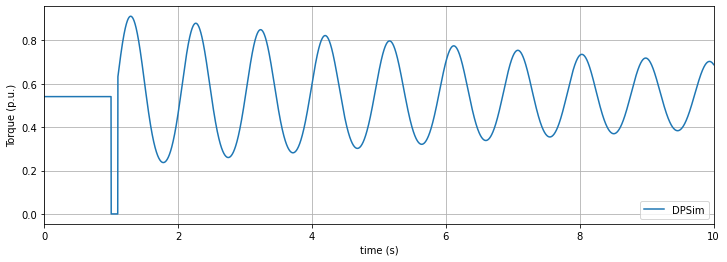

In [18]:
varname_dpsim = "Te"
varname_psat = "p"

rmse_torque = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### $E_q^{'}$

RMSE Edq0_1  = 0.015202 (pu), which is 1.609% of the nominal value = 0.945 (pu) 


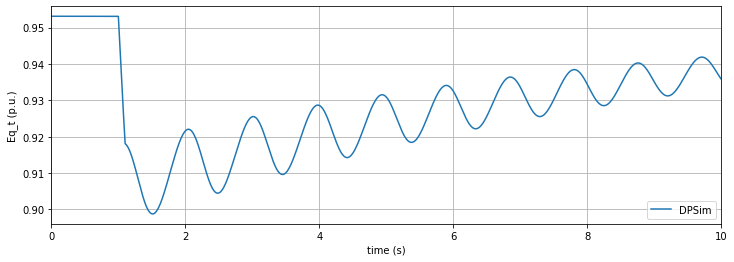

In [19]:
varname_dpsim = "Edq0_1"
varname_psat = "eq_t"

rmse_eq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### $V_d$

RMSE Vdq0_0  = 0.109893 (pu), which is 17.195% of the nominal value = 0.639 (pu) 


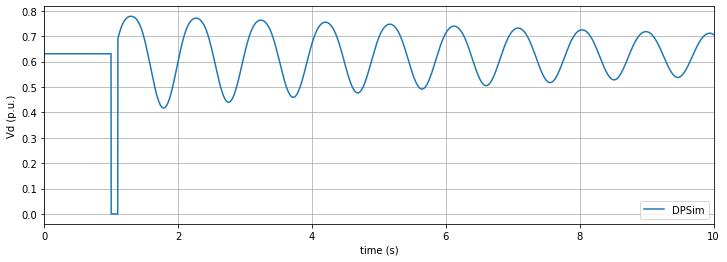

In [20]:
varname_dpsim = "Vdq0_0"
varname_psat = "vd"

rmse_vd = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### $V_q$

RMSE Vdq0_1  = 0.068639 (pu), which is 8.239% of the nominal value = 0.833 (pu) 


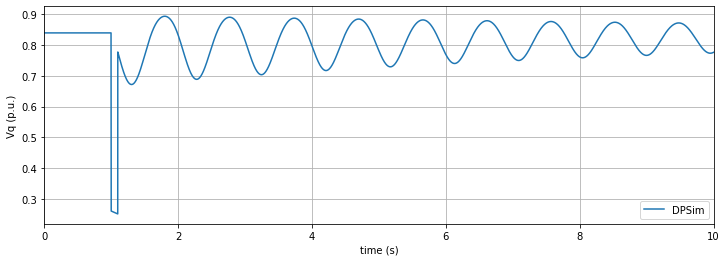

In [21]:
varname_dpsim = "Vdq0_1"
varname_psat = "vq"

rmse_vq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### $I_d$

RMSE Idq0_0  = 0.223663 (pu), which is 60.053% of the nominal value = 0.372 (pu) 


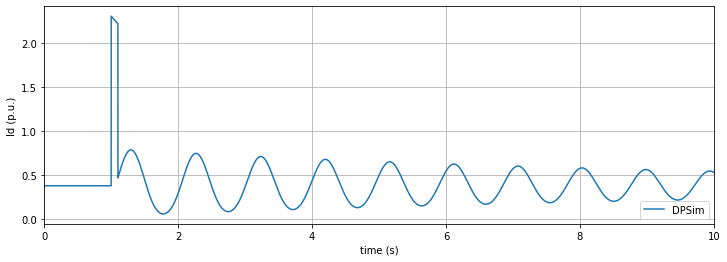

In [22]:
varname_dpsim = "Idq0_0"
varname_psat = "id"

rmse_id = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### $I_q$

RMSE Idq0_1  = 0.062439 (pu), which is 17.195% of the nominal value = 0.363 (pu) 


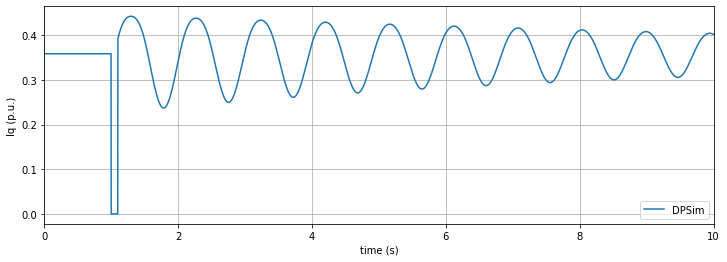

In [23]:
varname_dpsim = "Idq0_1"
varname_psat = "iq"

rmse_iq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### Delta

RMSE delta  = 0.228413 (pu), which is 25.122% of the nominal value = 0.909 (pu) 


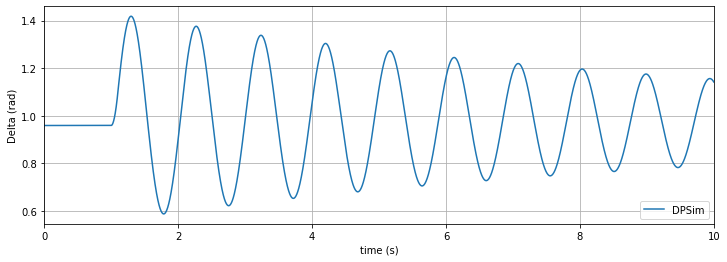

In [24]:
varname_dpsim = "delta"
varname_psat = "delta"

rmse_delta = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### Mechanical Omega

RMSE w_r  = 0.003966 (pu), which is 0.397% of the nominal value = 1.000 (pu) 


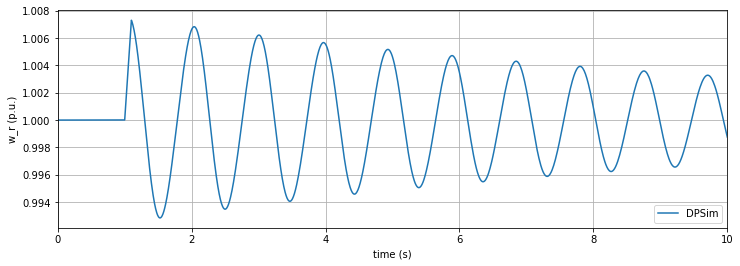

In [25]:
varname_dpsim = "w_r"
varname_psat = "omega"

rmse_omega = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_values, ylabels)

##### Grid voltages

RMSE n1.v  = 0.032422 (pu), which is 3.242% of the nominal value = 1.000 (pu) 


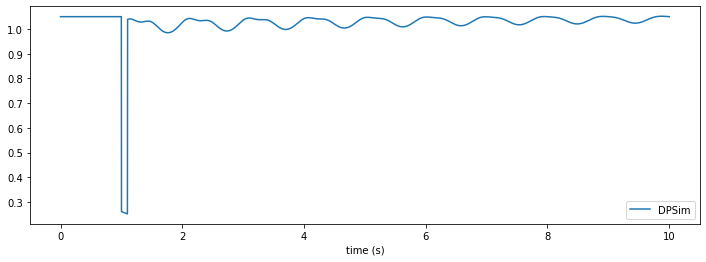

In [26]:
varname_dpsim = "n1.v"
varname_psat = "V_Bus1"

rmse_v1_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_grid_voltage, ylabels)

RMSE Post-Fault n1.v  = 7.290881 (deg)


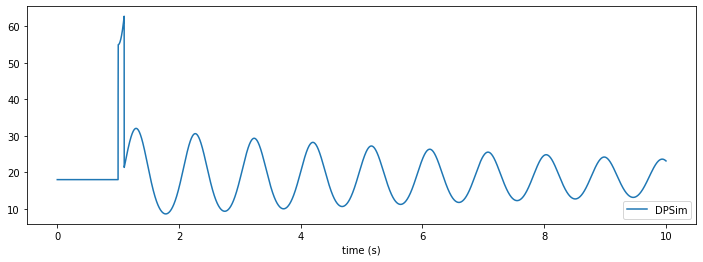

In [27]:
varname_dpsim = "n1.v"
varname_psat = "theta_bus1"

rmse_v1_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_grid_voltage, ylabels)

RMSE n2.v  = 8.792037 (pu), which is 879.204% of the nominal value = 1.000 (pu) 


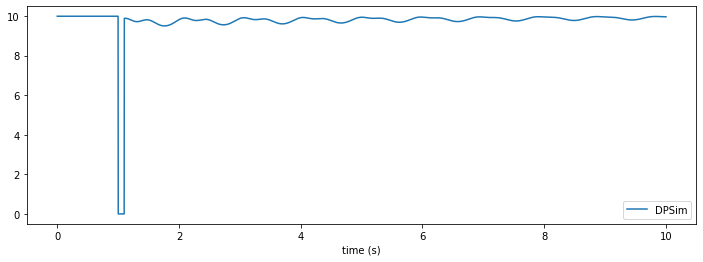

In [28]:
varname_dpsim = "n2.v"
varname_psat = "V_Bus3"

rmse_v2_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_grid_voltage, ylabels)

RMSE Post-Fault n2.v  = 16.147775 (deg)


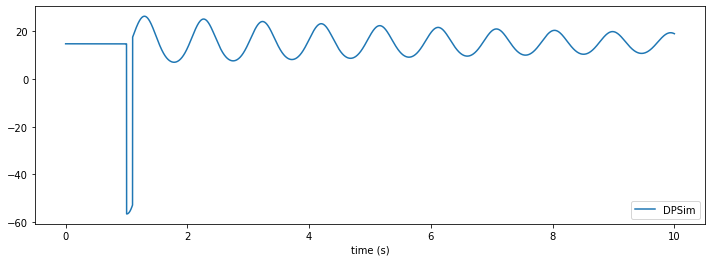

In [29]:
varname_dpsim = "n2.v"
varname_psat = "theta_bus3"

rmse_v2_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_3Order, ts_psat_3Order, nominal_grid_voltage, ylabels)

#### Assert

In [30]:
tol = 1.3 # %
tol_id = 7 # %
tol_deg_v1 = 0.16 # deg
tol_deg_v2 = 1e-12 # deg

assert(rmse_torque<tol)
assert(rmse_eq<tol)
assert(rmse_vd<tol)
assert(rmse_vq<tol)
assert(rmse_id<tol_id)
assert(rmse_iq<tol)
assert(rmse_delta<tol)
assert(rmse_omega<tol)
assert(rmse_v1_abs<tol)
assert(rmse_v2_abs<tol)
assert(rmse_v1_angle<tol_deg_v1)
assert(rmse_v2_angle<tol_deg_v2)

### 4th Order Model

In [31]:
log_name = sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, "4Order")

1.000000e+00: Handle event time
1.100000e+00: Handle event time


[15:03:22.034587 PiLine warning] Zero value for Conductance, setting default value of G=1e-06 [S]
[15:03:22.037843 SP_ReducedOrderSG_SMIB_4Order info] Initialize simulation: SP_ReducedOrderSG_SMIB_4Order
[15:03:22.037980 MnaSolverFactory info] creating SparseLUAdapter solver implementation
[15:03:22.040836 SP_ReducedOrderSG_SMIB_4Order_Solver warning] Linear solver configuration is not used!
[15:03:22.042509 SP_ReducedOrderSG_SMIB_4Order info] Scheduling tasks.
[15:03:22.042964 SP_ReducedOrderSG_SMIB_4Order info] Scheduling done.
[15:03:22.042968 SP_ReducedOrderSG_SMIB_4Order info] Opening interfaces.
[15:03:22.042970 SP_ReducedOrderSG_SMIB_4Order info] Start synchronization with remotes on interfaces
[15:03:22.042972 SP_ReducedOrderSG_SMIB_4Order info] Synchronized simulation start with remotes
[15:03:22.042974 SP_ReducedOrderSG_SMIB_4Order info] Start simulation: SP_ReducedOrderSG_SMIB_4Order
[15:03:22.042978 SP_ReducedOrderSG_SMIB_4Order info] Time step: 1.000000e-03
[15:03:22.04298

#### Read Results DPSim

In [32]:
# read Simulink log file

file_path = os.getcwd() + "/logs/" + log_name + "/" + log_name + ".csv"
ts_dpsim_4Order = read_timeseries_dpsim(file_path)

column number: 13
results length: 20000
real column names: ['Edq0_0', 'Edq0_1', 'Idq0_0', 'Idq0_1', 'Te', 'Vdq0_0', 'Vdq0_1', 'delta', 'w_r']
complex column names: ['i_gen', 'n1.v', 'n2.v', 'n3.v']


#### Plot and validate results

##### Electrical torque

RMSE Te  = 0.146197 (pu), which is 27.046% of the nominal value = 0.541 (pu) 


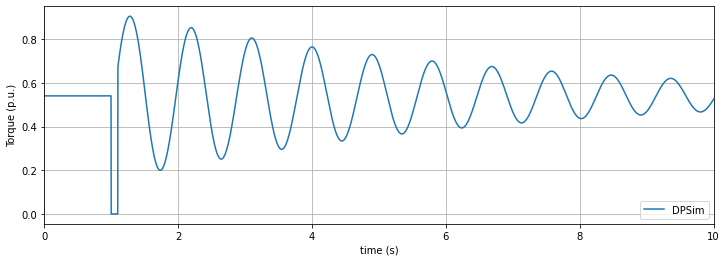

In [33]:
varname_dpsim = "Te"
varname_psat = "p"

rmse_torque = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $E_d^{'}$

RMSE Edq0_0  = 0.013661 (pu), which is 3.389% of the nominal value = 0.403 (pu) 


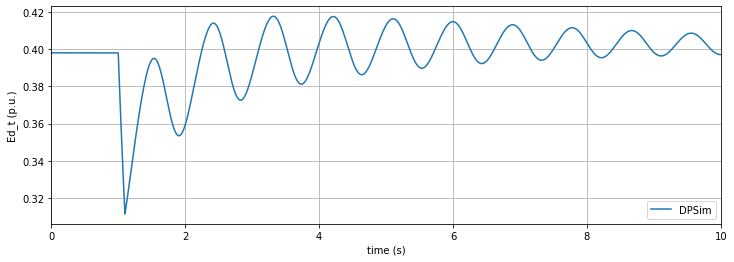

In [34]:
varname_dpsim = "Edq0_0"
varname_psat = "ed_t"

rmse_ed = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $E_q^{'}$

RMSE Edq0_1  = 0.014001 (pu), which is 1.482% of the nominal value = 0.945 (pu) 


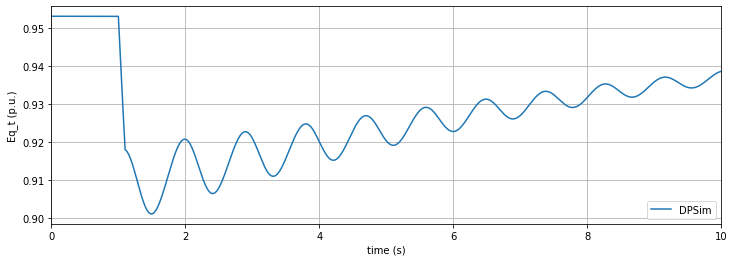

In [35]:
varname_dpsim = "Edq0_1"
varname_psat = "eq_t"

rmse_eq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $V_d$

RMSE Vdq0_0  = 0.052382 (pu), which is 8.196% of the nominal value = 0.639 (pu) 


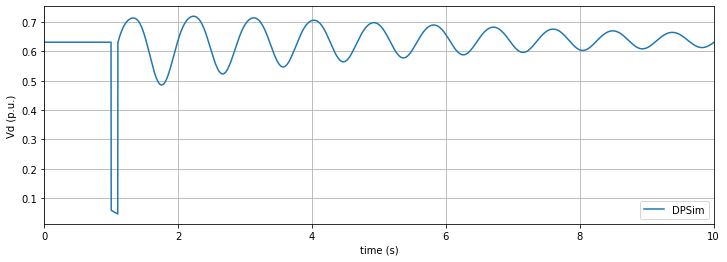

In [36]:
varname_dpsim = "Vdq0_0"
varname_psat = "vd"

rmse_vd = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $V_q$

RMSE Vdq0_1  = 0.048439 (pu), which is 5.814% of the nominal value = 0.833 (pu) 


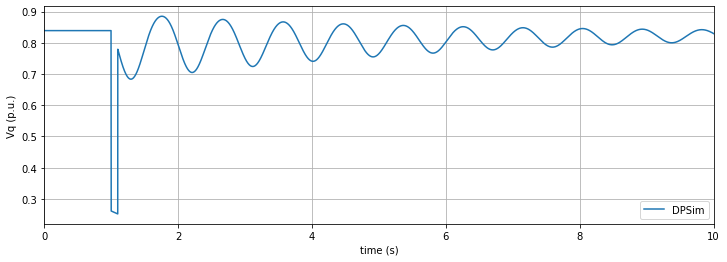

In [37]:
varname_dpsim = "Vdq0_1"
varname_psat = "vq"

rmse_vq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $I_d$

RMSE Idq0_0  = 0.155040 (pu), which is 41.628% of the nominal value = 0.372 (pu) 


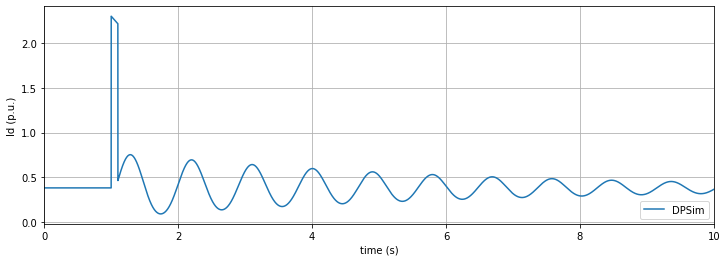

In [38]:
varname_dpsim = "Idq0_0"
varname_psat = "id"

rmse_id = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### $I_q$

RMSE Idq0_1  = 0.074242 (pu), which is 20.446% of the nominal value = 0.363 (pu) 


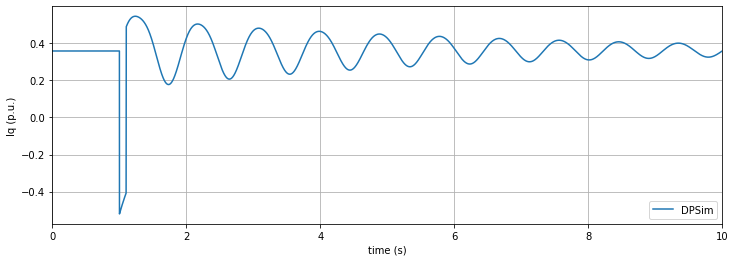

In [39]:
varname_dpsim = "Idq0_1"
varname_psat = "iq"

rmse_iq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### Delta

RMSE delta  = 0.149433 (pu), which is 16.435% of the nominal value = 0.909 (pu) 


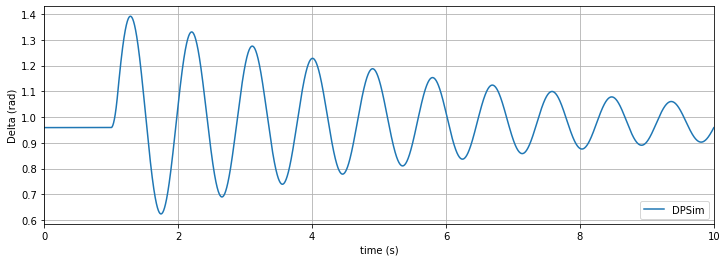

In [40]:
varname_dpsim = "delta"
varname_psat = "delta"

rmse_delta = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### Mechanical Omega

RMSE w_r  = 0.002729 (pu), which is 0.273% of the nominal value = 1.000 (pu) 


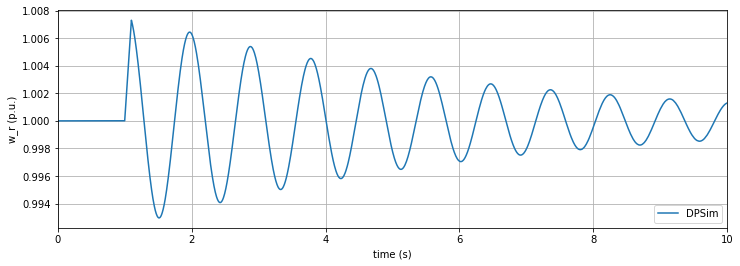

In [41]:
varname_dpsim = "w_r"
varname_psat = "omega"

rmse_omega = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_values, ylabels)

##### Grid voltages

RMSE n1.v  = 0.027113 (pu), which is 2.711% of the nominal value = 1.000 (pu) 


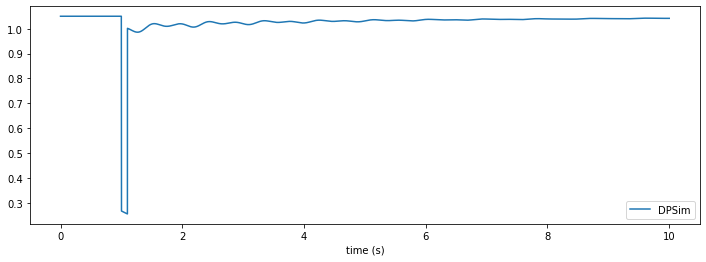

In [42]:
varname_dpsim = "n1.v"
varname_psat = "V_Bus1"

rmse_v1_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_grid_voltage, ylabels)

RMSE Post-Fault n1.v  = 6.125530 (deg)


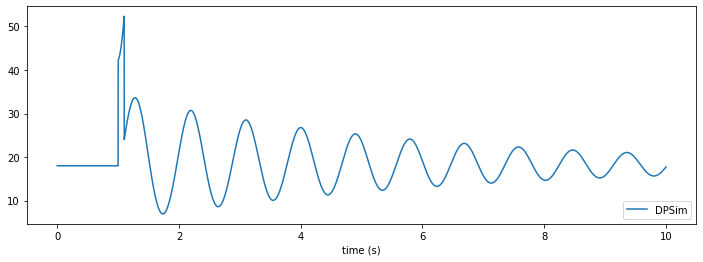

In [43]:
varname_dpsim = "n1.v"
varname_psat = "theta_bus1"

rmse_v1_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_grid_voltage, ylabels)

RMSE n2.v  = 8.792414 (pu), which is 879.241% of the nominal value = 1.000 (pu) 


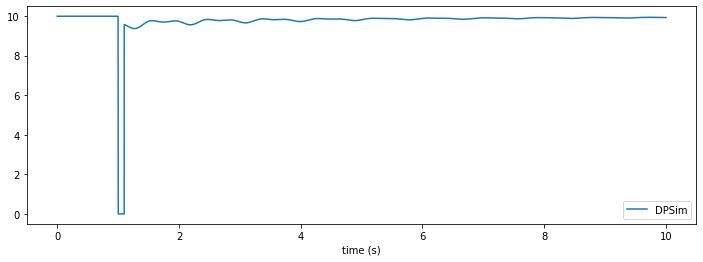

In [44]:
varname_dpsim = "n2.v"
varname_psat = "V_Bus3"

rmse_v2_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_grid_voltage, ylabels)

RMSE Post-Fault n2.v  = 15.995254 (deg)


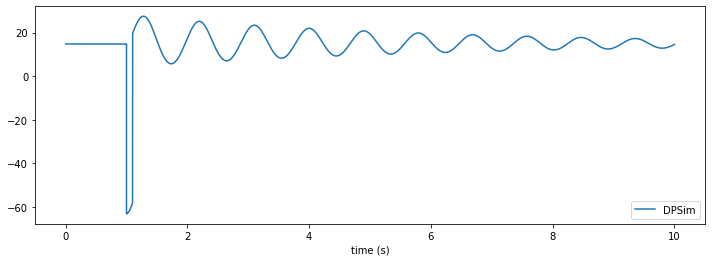

In [45]:
varname_dpsim = "n2.v"
varname_psat = "theta_bus3"

rmse_v2_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_4Order, ts_psat_4Order, nominal_grid_voltage, ylabels)

#### Assert

In [46]:
tol = 1 # %
tol_id = 6 # %
tol_iq = 2.3 # %
tol_deg_v1 = 0.2 # deg
tol_deg_v2 = 1e-12 # deg

assert(rmse_torque<tol)
assert(rmse_ed<tol)
assert(rmse_eq<tol)
assert(rmse_vd<tol)
assert(rmse_vq<tol)
assert(rmse_id<tol_id)
assert(rmse_iq<tol_iq)
assert(rmse_delta<tol)
assert(rmse_omega<tol)
assert(rmse_v1_abs<tol)
assert(rmse_v2_abs<tol)
assert(rmse_v1_angle<tol_deg_v1)
assert(rmse_v2_angle<tol_deg_v2)

### 5th Order Model

In [47]:
log_name = sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, "5Order")

AttributeError: module 'dpsimpy.sp.ph1' has no attribute 'SynchronGenerator5OrderVBR'

#### Read DPSim results

In [ ]:
# read Simulink log file

file_path = os.getcwd() + "/logs/" + log_name + "/" + log_name + ".csv"
ts_dpsim_5Order = read_timeseries_dpsim(file_path)

#### Plot and validate results

##### Electrical Torque

In [ ]:
varname_dpsim = "Te"
varname_psat = "p"

rmse_torque = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $E_q^{'}$

In [ ]:
varname_dpsim = "Edq0_t_1"
varname_psat = "eq_t"

rmse_eq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $E_d^{''}$

In [ ]:
varname_dpsim = "Edq0_s_0"
varname_psat = "ed_s"

rmse_ed_s = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $E_q^{''}$

In [ ]:
varname_dpsim = "Edq0_s_1"
varname_psat = "eq_s"

rmse_eq_s = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $V_d$

In [ ]:
varname_dpsim = "Vdq0_0"
varname_psat = "vd"

rmse_vd = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $V_q$

In [ ]:
varname_dpsim = "Vdq0_1"
varname_psat = "vq"

rmse_vq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $I_d$

In [ ]:
varname_dpsim = "Idq0_0"
varname_psat = "id"

rmse_id = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### $I_q$

In [ ]:
varname_dpsim = "Idq0_1"
varname_psat = "iq"

rmse_iq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### Delta

In [ ]:
varname_dpsim = "delta"
varname_psat = "delta"

rmse_delta = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### Mechanical omega

In [ ]:
varname_dpsim = "w_r"
varname_psat = "omega"

rmse_omega = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_values, ylabels)

##### Grid voltages

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "V_Bus1"

rmse_v1_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "theta_bus1"

rmse_v1_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "V_Bus3"

rmse_v2_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "theta_bus3"

rmse_v2_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_5Order, ts_psat_5bOrder, nominal_grid_voltage, ylabels)

### Assert

In [ ]:
tol = 1.3 #%
tol_id = 7.3
tol_iq = 4.5
tol_deg_v1 = 0.11 # deg
tol_deg_v2 = 1e-12 # deg

assert(rmse_torque<tol)
assert(rmse_eq<tol)
assert(rmse_ed_s<tol)
assert(rmse_eq_s<tol)
assert(rmse_vd<tol)
assert(rmse_vq<tol)
assert(rmse_id<tol_id)
assert(rmse_iq<tol_iq)
assert(rmse_delta<tol)
assert(rmse_omega<tol)
assert(rmse_v1_abs<tol)
assert(rmse_v2_abs<tol)
assert(rmse_v1_angle<tol_deg_v1)
assert(rmse_v2_angle<tol_deg_v2)

### 6th Order Model (Marconato's model)

In [ ]:
log_name = sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, "6aOrder")

#### Read DPSim results

In [ ]:
# read Simulink log file

file_path = os.getcwd() + "/logs/" + log_name + "/" + log_name + ".csv"
ts_dpsim_6aOrder = read_timeseries_dpsim(file_path)

#### Plot and validate results

##### Electrical Torque

In [ ]:
varname_dpsim = "Te"
varname_psat = "p"

rmse_torque = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $E_d^{'}$

In [ ]:
varname_dpsim = "Edq0_t_0"
varname_psat = "ed_t"

rmse_ed = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $E_q^{'}$

In [ ]:
varname_dpsim = "Edq0_t_1"
varname_psat = "eq_t"

rmse_eq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $E_d^{''}$

In [ ]:
varname_dpsim = "Edq0_s_0"
varname_psat = "ed_s"

rmse_ed_s = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $E_q^{''}$

In [ ]:
varname_dpsim = "Edq0_s_1"
varname_psat = "eq_s"

rmse_eq_s = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $V_d$

In [ ]:
varname_dpsim = "Vdq0_0"
varname_psat = "vd"

rmse_vd = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $V_q$

In [ ]:
varname_dpsim = "Vdq0_1"
varname_psat = "vq"

rmse_vq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $I_d$

In [ ]:
varname_dpsim = "Idq0_0"
varname_psat = "id"

rmse_id = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### $I_q$

In [ ]:
varname_dpsim = "Idq0_1"
varname_psat = "iq"

rmse_iq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### Delta

In [ ]:
varname_dpsim = "delta"
varname_psat = "delta"

rmse_delta = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### Mechanical omega

In [ ]:
varname_dpsim = "w_r"
varname_psat = "omega"

rmse_omega = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_values, ylabels)

##### Grid voltages

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "V_Bus1"

rmse_v1_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "theta_bus1"

rmse_v1_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "V_Bus3"

rmse_v2_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "theta_bus3"

rmse_v2_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_6aOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

### Assert

In [ ]:
tol = 1.3 #%
tol_id = 7.3
tol_iq = 4.8
tol_deg_v1 = 0.13 # deg
tol_deg_v2 = 1e-12 # deg

assert(rmse_torque<tol)
assert(rmse_ed<tol)
assert(rmse_eq<tol)
assert(rmse_ed_s<tol)
assert(rmse_eq_s<tol)
assert(rmse_vd<tol)
assert(rmse_vq<tol)
assert(rmse_id<tol_id)
assert(rmse_iq<tol_iq)
assert(rmse_delta<tol)
assert(rmse_omega<tol)
assert(rmse_v1_abs<tol)
assert(rmse_v2_abs<tol)
assert(rmse_v1_angle<tol_deg_v1)
assert(rmse_v2_angle<tol_deg_v2)

### Validation 6th Order Model (Anderson-Fouad's model)

In [ ]:
log_name = sp_reducedOrderSG_SMIB_fault(sim_pf, gen_pf, "6bOrder")

#### Read DPSim Results

In [ ]:
# read Simulink log file

file_path = os.getcwd() + "/logs/" + log_name + "/" + log_name + ".csv"
ts_dpsim_6bOrder = read_timeseries_dpsim(file_path)

#### Plot and validate results

##### Electrical Torque

In [ ]:
varname_dpsim = "Te"
varname_psat = "p"

rmse_torque = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### $V_d$

In [ ]:
varname_dpsim = "Vdq0_0"
varname_psat = "vd"

rmse_vd = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### $V_q$

In [ ]:
varname_dpsim = "Vdq0_1"
varname_psat = "vq"

rmse_vq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### $I_d$

In [ ]:
varname_dpsim = "Idq0_0"
varname_psat = "id"

rmse_id = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### $I_q$

In [ ]:
varname_dpsim = "Idq0_1"
varname_psat = "iq"

rmse_iq = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### Delta

In [ ]:
varname_dpsim = "delta"
varname_psat = "delta"

rmse_delta = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### Mechanical omega

In [ ]:
varname_dpsim = "w_r"
varname_psat = "omega"

rmse_omega = plot_variable(titles, varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_values, ylabels)

##### Grid voltages

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "V_Bus1"

rmse_v1_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n1.v"
varname_psat = "theta_bus1"

rmse_v1_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "V_Bus3"

rmse_v2_abs = plot_node_volt_abs(varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

In [ ]:
varname_dpsim = "n2.v"
varname_psat = "theta_bus3"

rmse_v2_angle = plot_node_volt_angle(varname_dpsim, varname_psat, ts_dpsim_6bOrder, ts_psat_6Order, nominal_grid_voltage, ylabels)

##### Assert

In [ ]:
tol = 1 #%
tol_id = 7.6 #%
tol_iq = 5.2 #%
tol_torque = 1.8
tol_deg_v1 = 0.25 # deg
tol_deg_v2 = 1e-12 # deg

assert(rmse_torque<tol_torque)
assert(rmse_vd<tol)
assert(rmse_vq<tol)
assert(rmse_id<tol_id)
assert(rmse_iq<tol_iq)
assert(rmse_delta<tol)
assert(rmse_omega<tol)
assert(rmse_v1_abs<tol)
assert(rmse_v2_abs<tol)
assert(rmse_v1_angle<tol_deg_v1)
assert(rmse_v2_angle<tol_deg_v2)